<table>
<caption><h1>Made by<h1></caption>
<tr>
<td><h3>Name</h3></td>
<td><h3>Banner Number</h3></td>
</tr>
<tr>
<td><h3>Daksh Patel</h3></td>
<td><h3>B00843468</h3></td>
</tr>
<tr>
<td><h3>Poojan Patel</h3></td>
<td><h3>B00836202</h3></td>
</tr>
</table>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import torch
import torchvision
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
import math

# Q a)

In [0]:
df=pd.read_csv('sample_data/iris.data',names=['sepal length','sepal width','petal length','petal width','target'])

In [0]:
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [0]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

x = df.loc[:, features].values

y = df.loc[:,['target']].values

scaler=StandardScaler()
x = scaler.fit_transform(x)


In [0]:
x.shape

(150, 4)

In [0]:
pca=decomposition.PCA(n_components=4)

In [0]:
principalComponents=pca.fit_transform(x)

In [0]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])

In [0]:
principalDf[['principal component 1', 'principal component 2']]

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [0]:
principalDf[['principal component 3', 'principal component 4']]

,principal component 3,principal component 4
0,-0.121943,-0.023073
1,-0.227251,-0.103208
2,0.051480,-0.027825
3,0.098860,0.066311
4,0.021428,0.037397
...,...,...
145,0.254532,-0.388890
146,-0.025382,-0.221322
147,0.179277,-0.118903
148,0.931405,-0.024146


In [0]:
finalDf_first_2 = pd.concat([principalDf[['principal component 1', 'principal component 2']], df[['target']]], axis = 1)
finalDf_last_2 = pd.concat([principalDf[['principal component 3', 'principal component 4']], df[['target']]], axis = 1)

# Q a) i)

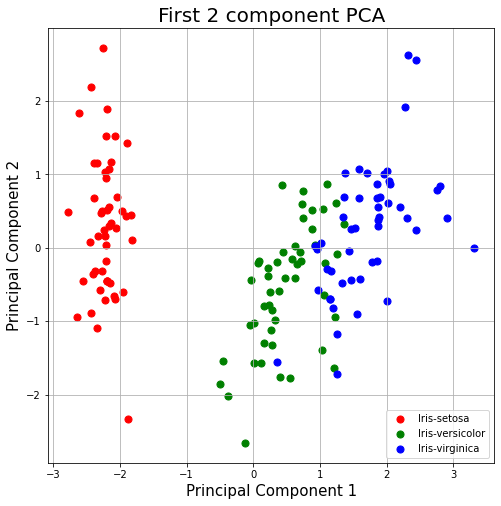

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('First 2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_first_2['target'] == target
    ax.scatter(finalDf_first_2.loc[indicesToKeep, 'principal component 1']
               , finalDf_first_2.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Q a) ii)

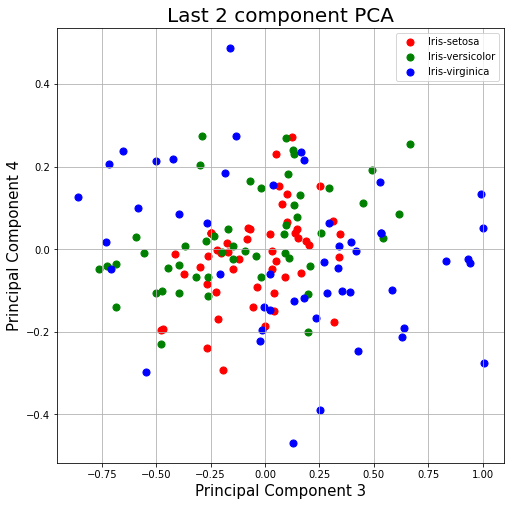

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 3', fontsize = 15)
ax.set_ylabel('Principal Component 4', fontsize = 15)
ax.set_title('Last 2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_last_2['target'] == target
    ax.scatter(finalDf_last_2.loc[indicesToKeep, 'principal component 3']
               , finalDf_last_2.loc[indicesToKeep, 'principal component 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [0]:
variances=np.around((pca.explained_variance_ratio_*100),2)
principals=['Principal {}'.format(i) for i in range(1,5)]

data=[variances]

final_op=pd.DataFrame(data, columns=principals)
print('Varaince stored in each component')
final_op

Varaince stored in each component


,Principal 1,Principal 2,Principal 3,Principal 4
0,72.77,23.03,3.68,0.52


## The above cell shows the almost 95% of information(variance) is stored in the first two principal component of the iris dataset. 

## The function createBatches is used to create the batches (both data and labels) of in the dataset.

In [0]:
def createBatches(data, labels, batch_size=1):
  full_dataset=[]
  full_labels=[]
  for i in range(0,data.shape[0],batch_size):
    batch=torch.tensor(data[i:i+batch_size],dtype=torch.float32).clone().detach()
    batch=batch.reshape(-1,1, *data.shape[1:])
    batch_labels=labels[i:i+batch_size]
    full_dataset.append((batch, batch_labels))
  return full_dataset

## The function createBatches is used to plot the bar charts for the training and test accuracies

In [0]:
def plot_bar_graphs(train_acc, test_acc, title):
  labels = train_acc[0]
  train_accs = train_acc[1]
  test_accs = test_acc[1]

  x = np.arange(len(labels))  # the label locations
  width = 0.35  # the width of the bars

  # fig=plt.figure(figsize=(10,10))
  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, train_accs, width, label='Train')
  rects2 = ax.bar(x + width/2, test_accs, width, label='Test')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Accuracy')
  ax.set_xlabel('Variance')
  ax.set_title('Scores by variance')
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend()


  def autolabel(rects):
      """Attach a text label above each bar in *rects*, displaying its height."""
      for rect in rects:
          height = rect.get_height()
          ax.annotate('{}'.format(height),
                      xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom')


  autolabel(rects1)
  autolabel(rects2)

  # fig.tight_layout()
  plt.title(title)
  plt.show()

# Q2

### The class FeedForwardNet is the simple neural network with one hidden layer.

### The class CNN is the modified version of the class provided in assignment 3 for performing the image classification

In [0]:
class FeedForwardNet(nn.Module):
  def __init__(self, input_size = 331, hidden_size = 64, output_size = 10):
    super(FeedForwardNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.out = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    x = F.relu(self.l1(x))
    x = F.log_softmax(self.out(x), dim=1)
    return x

class CNN(nn.Module):
  def __init__(self, input_size=[28,28], hidden_sizes=[120, 84], filter_size = 3, pooling_size = 2):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 3)
    self.pool = nn.MaxPool2d(2, 2)
    reduced_conv1 = ((28 - filter_size) / 1) + 1
    reduced_pool = math.floor(
        ((reduced_conv1 - pooling_size) / 2) + 1)
    reduced_conv2 = ((reduced_pool - filter_size) / 1) + 1
    reduced_pool=math.floor(
        ((reduced_conv2 - pooling_size) / 2) + 1)
    self.conv2 = nn.Conv2d(6, 16, 3)
    self.fc1 = nn.Linear(16 * reduced_pool * reduced_pool, 120)
    self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
    self.fc3 = nn.Linear(hidden_sizes[1], 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * x.size()[2]  * x.size()[2])
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.log_softmax(self.fc3(x), dim=1)
    return x  

## The function eval_net_simple is the utility function is used to train the FeedForwardNet required in the **`Q b: i).`**


In [0]:
def eval_net_simple(epochs, train_loader, test_loader):
  ##### Prepare return values ##################################################
  losses = []
  train_acc = 0
  test_acc = 0

  ##### Initialize the network and optimizer ###################################

  print("\nInitializing the simple neural network ...")

  # print(train_loader[0][0].shape[-1])
  input_size=train_loader[0][0].shape[-1]
  hidden_size=input_size/2.5

  net = FeedForwardNet(input_size=input_size, hidden_size=int(hidden_size))
  net.cuda()

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(net.parameters(), lr=0.001) # lr = learning rate/step size

  ##### Training the network ###################################################

  print("Training the network ...")
  for e in range(epochs):  # loop over the dataset multiple times
    print("Epoch: ", e+1)
    for data in train_loader:
      inputs, labels = data
      inputs=inputs.cuda()
      labels=labels.cuda()
      optimizer.zero_grad() # zero the parameter gradients
      inputs=inputs.view(inputs.shape[0],-1)
      # print(inputs.shape)
      outputs = net(inputs) # forward pass
      loss = criterion(outputs, labels) # compute loss
      loss.backward() # backward pass
      optimizer.step() # gradient descent update
      losses.append(loss.item())

  ##### Evaluating the network on training data ################################
  print("Evaluating on training data ...")
  correct = 0
  total = 0
  with torch.no_grad():
    for data in train_loader:
      inputs, labels = data
      inputs=inputs.cuda()
      labels=labels.cuda()
      inputs=inputs.view(inputs.shape[0],-1)
      outputs = net(inputs)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  train_acc = correct / total

  ##### Evaluating the network on test data ####################################
  print("Evaluating on test data ...")
  correct = 0
  total = 0
  with torch.no_grad():
    for data in test_loader:
      inputs, labels = data
      inputs=inputs.cuda()
      labels=labels.cuda()
      inputs=inputs.view(inputs.shape[0],-1)
      outputs = net(inputs)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  test_acc = correct / total

  return losses, train_acc, test_acc

## The function eval_net_cnn is the utility function is used to train the FeedForwardNet required in the **`Q b: ii).`**


In [0]:
def eval_net_cnn(epochs,  train_loader, test_loader):

  ##### Prepare return values ##################################################
  losses = []
  train_acc = 0
  test_acc = 0

  ##### Initialize the network and optimizer ###################################

  print("\nInitializing the convolutional neural network ...")

  net = CNN()
  net.cuda()

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(net.parameters(), lr=0.001)

  ##### Training the network ###################################################

  print("Training the network ...")
  for e in range(epochs):  # loop over the dataset multiple times
    print("Epoch: ", e+1)
    for data in train_loader:
      inputs, labels = data
      inputs=inputs.cuda()
      labels=labels.cuda()
      optimizer.zero_grad()
      outputs = net(inputs)
      loss = criterion(outputs, labels) # compute loss
      loss.backward(retain_graph=True) # backward pass
      optimizer.step() # gradient descent update
      losses.append(loss.item())

  ##### Evaluating the network on training data ################################
  print("Evaluating on training data ...")
  correct = 0
  total = 0
  with torch.no_grad():
    for data in train_loader:
      inputs, labels = data
      inputs=inputs.cuda()
      labels=labels.cuda()
      outputs = net(inputs)
      _, predicted = torch.max(outputs.data, 1)
      # print(labels.shape, predicted.shape, outputs.shape)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  train_acc = correct / total

  ##### Evaluating the network on test data ####################################
  print("Evaluating on test data ...")
  correct = 0
  total = 0
  with torch.no_grad():
    for data in test_loader:
      inputs, labels = data
      inputs=inputs.cuda()
      labels=labels.cuda()
      outputs = net(inputs)
      _, predicted = torch.max(outputs.data, 1)
      # print(inputs.shape, labels.shape, predicted.shape, outputs.shape)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  test_acc = correct / total

  return losses, train_acc, test_acc

### The below cell performs all the operations required in the **`Q b)`**


Starting PCA for variance = 0.5
PCA done successfully.

Components for variance = 0.5 are 39

Initializing the simple neural network ...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Evaluating on training data ...
Evaluating on test data ...
Training accuracy: 93.31%
Test accuracy: 93.2%


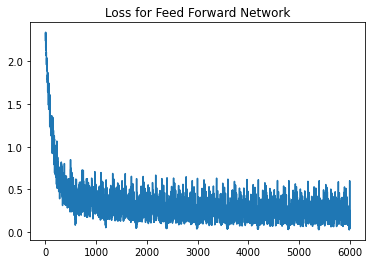

Reconstructing the images for train and test data

Initializing the convolutional neural network ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Evaluating on training data ...
Evaluating on test data ...
Training accuracy: 98.34%
Test accuracy: 97.36%


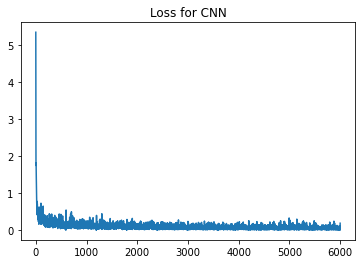


Starting PCA for variance = 0.75
PCA done successfully.

Components for variance = 0.75 are 120


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """



Initializing the simple neural network ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Evaluating on training data ...
Evaluating on test data ...
Training accuracy: 98.0%
Test accuracy: 96.78%


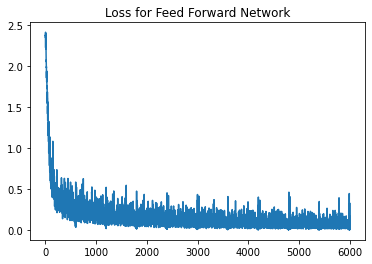

Reconstructing the images for train and test data

Initializing the convolutional neural network ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Evaluating on training data ...
Evaluating on test data ...
Training accuracy: 99.1%
Test accuracy: 98.02%


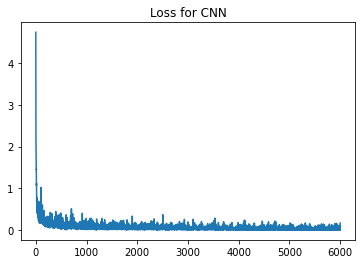


Starting PCA for variance = 0.9
PCA done successfully.

Components for variance = 0.9 are 236


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """



Initializing the simple neural network ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Evaluating on training data ...
Evaluating on test data ...
Training accuracy: 99.31%
Test accuracy: 97.13%


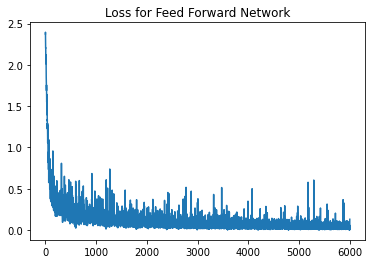

Reconstructing the images for train and test data

Initializing the convolutional neural network ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Evaluating on training data ...
Evaluating on test data ...
Training accuracy: 99.35%
Test accuracy: 98.42%


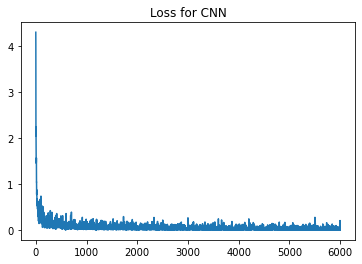


Starting PCA for variance = 0.95
PCA done successfully.

Components for variance = 0.95 are 331


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """



Initializing the simple neural network ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Evaluating on training data ...
Evaluating on test data ...
Training accuracy: 99.67%
Test accuracy: 97.3%


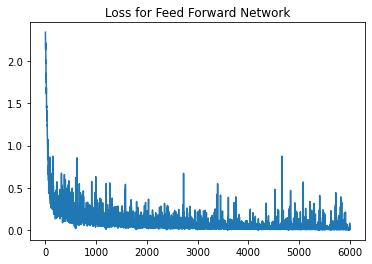

Reconstructing the images for train and test data

Initializing the convolutional neural network ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Evaluating on training data ...
Evaluating on test data ...
Training accuracy: 99.03%
Test accuracy: 98.22%


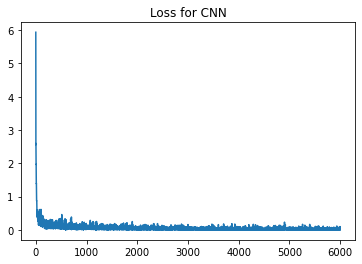

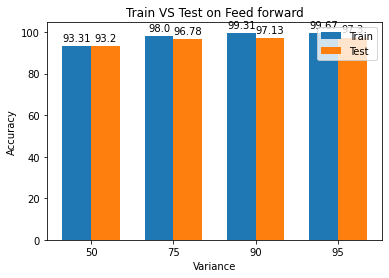

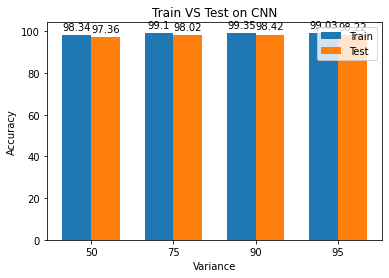

In [0]:
train_set = datasets.MNIST('./mnist_data', download=True, train=True,
                            transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,))
                            ]))
test_set = datasets.MNIST('./mnist_data', download=True, train=False,
                            transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,))
                            ]))
x_train_b = train_set.data.reshape(train_set.data.shape[0],-1)
x_test_b = test_set.data.reshape(test_set.data.shape[0],-1)

# Creating the numpy object for the above objects
x_train_b = x_train_b.numpy()
x_test_b = x_test_b.numpy()

# print(x_train_b.shape, x_test_b.shape)

variances=[50, 75, 90, 95]

train_acc_feed_forward=[variances,[]]
test_acc_feed_forward=[variances,[]]
train_acc_cnn=[variances,[]]
test_acc_cnn=[variances,[]]
epochs=10
for variance in variances:
  variance=variance/100
  print('\nStarting PCA for variance = {}'.format(variance))
  # Creating Scalar object and scaling the data to a specific range
  scalar_b = StandardScaler()
  x_train_b_sc = scalar_b.fit_transform(x_train_b)
  x_test_b_sc = scalar_b.transform(x_test_b)

  # Creating PCA object and getting components which contains "variance"% of data
  pca_b = decomposition.PCA(variance)
  x_train_b_pca = pca_b.fit_transform(x_train_b_sc)
  x_test_b_pca = pca_b.transform(x_test_b_sc)

  # Printing the number of features received after applying PCA.
  print('PCA done successfully.')
  print('\nComponents for variance = {} are {}'.format(variance, x_train_b_pca.shape[-1]))

  train_set.data=torch.tensor(x_train_b_pca)
  test_set.data=torch.tensor(x_test_b_pca)

  trainset=train_set
  valset=test_set

  batch_size=100
  train_loader=createBatches(trainset.data,trainset.targets,batch_size)
  test_loader=createBatches(valset.data, valset.targets,batch_size)

  losses, train_acc, test_acc = eval_net_simple(epochs,train_loader, test_loader)
  print("Training accuracy: {}%".format(round(train_acc*100,2)))
  print("Test accuracy: {}%".format(round(test_acc*100,2)))

  train_acc_feed_forward[1].append(round(train_acc*100,2))
  test_acc_feed_forward[1].append(round(test_acc*100,2))
  plt.plot(losses)
  plt.title('Loss for Feed Forward Network')
  plt.show()

  print('Reconstructing the images for train and test data')

  reconst_train_imgs = scalar_b.inverse_transform(pca_b.inverse_transform(x_train_b_pca))
  shp = reconst_train_imgs[:].shape
  reconst_reshaped_train = reconst_train_imgs[:].reshape(shp[0], 28, 28)

  reconst_test_imgs = scalar_b.inverse_transform(pca_b.inverse_transform(x_test_b_pca))
  shp = reconst_test_imgs[:].shape
  reconst_reshaped_test = reconst_test_imgs[:].reshape(shp[0], 28, 28)

  # plt.imshow(reconst_reshaped_train[0], cmap='gray')
  # plt.title('Sammple of Re-constructed image')
  # plt.show()

  # plt.imshow(x_train_b[0].reshape(28,28), cmap='gray')
  # plt.title('Sample of Actual image')
  # plt.show()

  trainset.data = reconst_reshaped_train
  valset.data = reconst_reshaped_test

  train_loader=createBatches(trainset.data,trainset.targets,batch_size)
  test_loader=createBatches(valset.data, valset.targets,batch_size)

  losses, train_acc, test_acc = eval_net_cnn(epochs, train_loader, test_loader)
  print("Training accuracy: {}%".format(round(train_acc*100,2)))
  print("Test accuracy: {}%".format(round(test_acc*100,2)))
  train_acc_cnn[1].append(round(train_acc*100,2))
  test_acc_cnn[1].append(round(test_acc*100,2))

  plt.plot(losses)
  plt.title('Loss for CNN')
  plt.show()

plot_bar_graphs(train_acc_feed_forward, test_acc_feed_forward, title="Train VS Test on Feed forward")
plot_bar_graphs(train_acc_cnn, test_acc_cnn, title="Train VS Test on CNN")

## Observation Q b)
### As we can see in the bar graph, Convolutional nural network  performs better than Feed forward neural network.



`The accuracy range of feed forward neural network is ~93 - ~99 where CNN has accuracy range of ~98 - ~99 which means feed forward neural network only works better when n_components are less while CNN works in all the conditions and gives consistent accuracy`


---

# Q c) 

## The class LinearAutoEncoder contains the neural network to enocode the vector and reduce it's dimentionality

In [0]:
class LinearAutoEncoder(nn.Module):
  def __init__(self, input_size = 784, hidden_size = 39):
    super(LinearAutoEncoder, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.out = nn.Linear(hidden_size, input_size)
      
  def encode(self, x):
    x = self.l1(x)
    x.reshape(x.shape[0],-1)
    return x

  def decode(self, x):
    x = self.out(x)
    x.reshape(x.shape[0],-1)
    return x

  def forward(self, x):
    x = self.encode(x)
    x = self.decode(x)
    return x

## The function eval_net_c is built to perform the required operation on the data using in `Q c)`

In [0]:
def eval_net_c(epochs, hidden_size, train_loader, test_loader):

  ##### Prepare return values ##################################################
  losses = []
  train_acc = 0
  test_acc = 0

  ##### Initialize the network and optimizer ###################################

  print("\nInitializing the Auto encoder-decoder with hidden-size: {} ...".format(hidden_size))

  input_size=train_loader[0][0].shape[-1]

  net = LinearAutoEncoder(input_size=input_size, hidden_size=hidden_size)
  net.cuda()

  criterion = nn.MSELoss()
  optimizer = optim.Adam(net.parameters(), lr=0.001) # lr = learning rate/step size

  ##### Training the network ###################################################
  train_acc_feed_forward=[variances,[]]
  test_acc_feed_forward=[variances,[]]
  train_acc_cnn=[variances,[]]
  test_acc_cnn=[variances,[]]

  print("Training the network ...")
  for e in range(epochs):  # loop over the dataset multiple times
    print("Epoch: ", e+1)
    for data in train_loader:
      inputs, _ = data
      labels = inputs
      inputs=inputs.cuda()
      labels=labels.cuda()
      optimizer.zero_grad() # zero the parameter gradients
      inputs=inputs.view(inputs.shape[0],-1)
      labels=labels.view(labels.shape[0],-1)
      outputs = net(inputs) # forward pass
      loss = criterion(outputs, labels) # compute loss
      loss.backward() # backward pass
      optimizer.step() # gradient descent update
      losses.append(loss.item())
    
  encoded_train_batches=[]
  encoded_test_batches=[]

  for data in train_loader:
    inputs, lbls = data
    labels = inputs
    inputs=inputs.cuda()
    labels=labels.cuda()
    inputs=inputs.view(inputs.shape[0],-1)
    encoded_train_batch=net.encode(inputs)
    encoded_train_batches.append((encoded_train_batch,lbls))
  
  for data in test_loader:
    inputs, lbls = data
    labels = inputs
    inputs=inputs.cuda()
    labels=labels.cuda()
    inputs=inputs.view(inputs.shape[0],-1)
    encoded_test_batch=net.encode(inputs)
    encoded_test_batches.append((encoded_test_batch, lbls))

  losses_simple, train_acc_simple, test_acc_simple = eval_net_simple(epochs,train_loader, test_loader)
  print("Training accuracy: ", round(train_acc_simple*100,2))
  print("Test accuracy: ", round(test_acc_simple*100,2))
  # plt.plot(losses_simple)
  # plt.show()

  decoded_train_batches=[]
  decoded_test_batches=[]
  
  for data in encoded_train_batches:
    inputs, lbls = data
    labels = inputs
    inputs=inputs.cuda()
    labels=labels.cuda()
    inputs=inputs.view(inputs.shape[0],-1)
    decoded_train_batch=net.decode(inputs)
    decoded_train_batches.append((decoded_train_batch.reshape(decoded_train_batch.shape[0], 1, 28 , 28), lbls))
  
  for data in encoded_train_batches:
    inputs, lbls = data
    labels = inputs
    inputs=inputs.cuda()
    labels=labels.cuda()
    inputs=inputs.view(inputs.shape[0],-1)
    decoded_test_batch=net.decode(inputs)
    decoded_test_batches.append((decoded_test_batch.reshape(decoded_train_batch.shape[0], 1, 28 ,28), lbls))

  losses_cnn, train_acc_cnn, test_acc_cnn = eval_net_cnn(epochs, decoded_train_batches, decoded_test_batches)
  print("Training accuracy: ", round(train_acc_cnn*100,2))
  print("Test accuracy: ", round(test_acc_cnn*2,2))
  # plt.plot(losses_cnn)
  # plt.show()

  return losses_simple, round(train_acc_simple*100,2), round(test_acc_simple*100,2), losses_cnn, round(train_acc_cnn*100,2), round(test_acc_cnn*100,2)

## `Q c: i & ii)` The below cells is the driver code which does all the operations required in ` Q c`.

torch.Size([60000, 784]) torch.Size([10000, 784])

Initializing the Auto encoder-decoder with hidden-size: 39 ...
Training the network ...
Epoch:  1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11

Initializing the simple neural network ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Evaluating on training data ...
Evaluating on test data ...
Training accuracy:  97.84
Test accuracy:  96.14

Initializing the convolutional neural network ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Evaluating on training data ...
Evaluating on test data ...
Training accuracy:  98.87
Test accuracy:  1.98


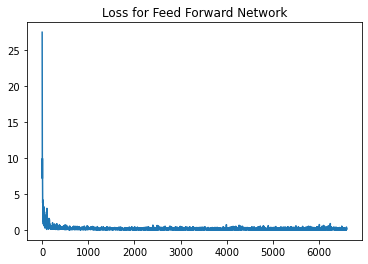

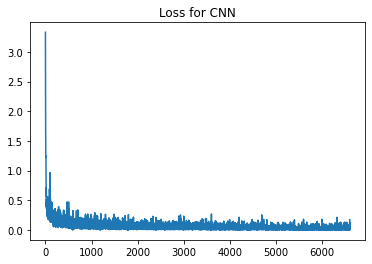


Initializing the Auto encoder-decoder with hidden-size: 120 ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11

Initializing the simple neural network ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Evaluating on training data ...
Evaluating on test data ...
Training accuracy:  97.28
Test accuracy:  95.81

Initializing the convolutional neural network ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Evaluating on training data ...
Evaluating on test data ...
Training accuracy:  99.68
Test accuracy:  1.99


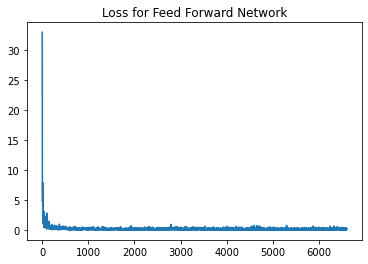

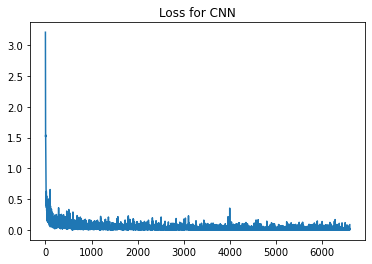


Initializing the Auto encoder-decoder with hidden-size: 236 ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11

Initializing the simple neural network ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Evaluating on training data ...
Evaluating on test data ...
Training accuracy:  97.57
Test accuracy:  95.95

Initializing the convolutional neural network ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Evaluating on training data ...
Evaluating on test data ...
Training accuracy:  99.17
Test accuracy:  1.98


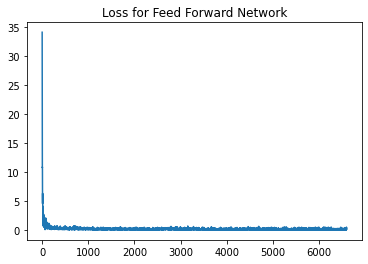

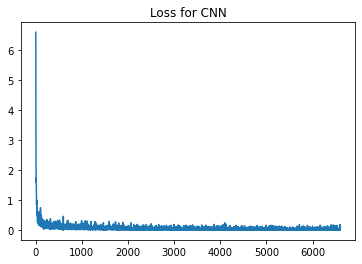


Initializing the Auto encoder-decoder with hidden-size: 331 ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11

Initializing the simple neural network ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Evaluating on training data ...
Evaluating on test data ...
Training accuracy:  96.92
Test accuracy:  95.8

Initializing the convolutional neural network ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Evaluating on training data ...
Evaluating on test data ...
Training accuracy:  99.48
Test accuracy:  1.99


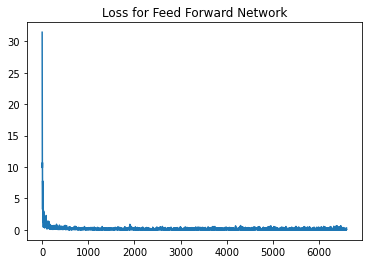

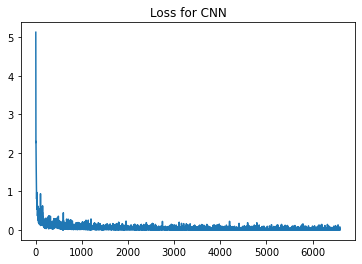

In [0]:
train_set = datasets.MNIST('./mnist_data', download=True, train=True,
                            transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,))
                            ]))
test_set = datasets.MNIST('./mnist_data', download=True, train=False,
                            transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,))
                            ]))

x_train_c=train_set.data
y_train_c=train_set.targets

x_test_c=test_set.data
y_test_c=test_set.targets

x_train_c = x_train_c.reshape(x_train_c.shape[0], -1)
x_test_c = x_test_c.reshape(x_test_c.shape[0], -1)

train_set.data=x_train_c
test_set.data=x_test_c

print(x_train_c.shape, x_test_c.shape)

hidden_sizes=[39,120,236,331]
variances=[50, 75, 90, 95]
input_size=784

trainset=train_set
valset=test_set

train_loader=createBatches(trainset.data,trainset.targets,batch_size)
test_loader=createBatches(valset.data, valset.targets,batch_size)

train_accs_feed_forward=[variances,[]]
test_accs_feed_forward=[variances,[]]
train_accs_cnn=[variances,[]]
test_accs_cnn=[variances,[]]

for hidden_size in hidden_sizes:
  losses_simple, train_acc_simple, test_acc_simple, losses_cnn, train_acc_cnn, test_acc_cnn = eval_net_c(11, hidden_size, train_loader, test_loader)
  # print("Training accuracy: ", train_acc)
  # print("Test accuracy: ", test_acc)
  train_accs_feed_forward[1].append(train_acc_simple)
  test_accs_feed_forward[1].append(test_acc_simple)
  train_accs_cnn[1].append(train_acc_cnn)
  test_accs_cnn[1].append(test_acc_cnn)
  plt.plot(losses_simple)
  plt.title('Loss for Feed Forward Network')
  plt.show()
  plt.plot(losses_cnn)
  plt.title('Loss for CNN')
  plt.show()

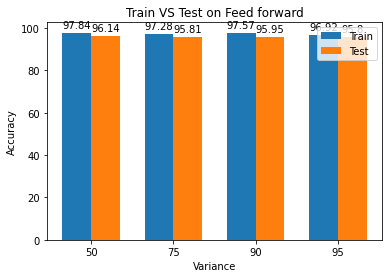

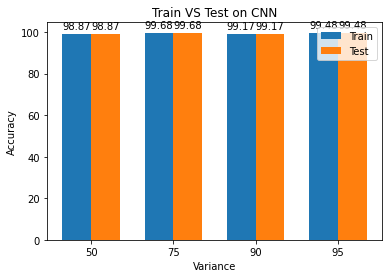

In [0]:
plot_bar_graphs(train_accs_feed_forward, test_accs_feed_forward, title="Train VS Test on Feed forward")
plot_bar_graphs(train_accs_cnn, test_accs_cnn, title="Train VS Test on CNN")

## Observation Q c)
### As we can see in the bar graph, auto encoders performs better in terms of accuracy than PCA.  


`Also, CNN performs better than feed forward neural netowork`

# Q d)

## The below cell defines a class for NonLinearAutoEncoder which is modified version of the auto-encoder with non-linear activation function (ReLU).

In [0]:
class NonLinearAutoEncoder(nn.Module):
  def __init__(self, input_size = 784, hidden_size = 39):
    super(NonLinearAutoEncoder, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.out = nn.Linear(hidden_size, input_size)
      
  def encode(self, x):
    x = F.relu(self.l1(x))
    x.reshape(x.shape[0],-1)
    return x

  def decode(self, x):
    x = F.relu(self.out(x))
    x.reshape(x.shape[0],-1)
    return x

  def forward(self, x):
    x = self.encode(x)
    x = self.decode(x)
    return x

## The function eval_net_d is used to perform all the required operations in the `Q d)`

In [0]:
def eval_net_d(epochs, hidden_size, train_loader, test_loader):

  ##### Prepare return values ##################################################
  losses = []
  train_acc = 0
  test_acc = 0

  ##### Initialize the network and optimizer ###################################

  print("\nInitializing the Auto encoder-decoder ...")

  # print(train_loader[0][0].shape[-1])
  input_size=train_loader[0][0].shape[-1]

  net = NonLinearAutoEncoder(input_size=input_size, hidden_size=hidden_size)
  net.cuda()

  criterion = nn.MSELoss()
  optimizer = optim.Adam(net.parameters(), lr=0.001) # lr = learning rate/step size

  ##### Training the network ###################################################

  print("Training the network ...")
  for e in range(epochs):  # loop over the dataset multiple times
    print("Epoch: ", e+1)
    for data in train_loader:
      inputs, _ = data
      labels = inputs
      inputs=inputs.cuda()
      labels=labels.cuda()
      optimizer.zero_grad() # zero the parameter gradients
      inputs=inputs.view(inputs.shape[0],-1)
      labels=labels.view(labels.shape[0],-1)
      outputs = net(inputs) # forward pass
      loss = criterion(outputs, labels) # compute loss
      loss.backward() # backward pass
      optimizer.step() # gradient descent update
      losses.append(loss.item())
    
  encoded_train_batches=[]
  encoded_test_batches=[]

  for data in train_loader:
    inputs, lbls = data
    labels = inputs
    inputs=inputs.cuda()
    labels=labels.cuda()
    inputs=inputs.view(inputs.shape[0],-1)
    encoded_train_batch=net.encode(inputs)
    encoded_train_batches.append((encoded_train_batch,lbls))
  
  for data in test_loader:
    inputs, lbls = data
    labels = inputs
    inputs=inputs.cuda()
    labels=labels.cuda()
    inputs=inputs.view(inputs.shape[0],-1)
    encoded_test_batch=net.encode(inputs)
    encoded_test_batches.append((encoded_test_batch, lbls))

  losses_simple, train_acc_simple, test_acc_simple = eval_net_simple(epochs,train_loader, test_loader)
  print("Training accuracy: ", round(train_acc_simple*100,2))
  print("Test accuracy: ", round(test_acc_simple*100,2))

  decoded_train_batches=[]
  decoded_test_batches=[]
  
  for data in encoded_train_batches:
    inputs, lbls = data
    labels = inputs
    inputs=inputs.cuda()
    labels=labels.cuda()
    inputs=inputs.view(inputs.shape[0],-1)
    decoded_train_batch=net.decode(inputs)
    decoded_train_batches.append((decoded_train_batch.reshape(decoded_train_batch.shape[0], 1, 28 , 28), lbls))
  
  for data in encoded_train_batches:
    inputs, lbls = data
    labels = inputs
    inputs=inputs.cuda()
    labels=labels.cuda()
    inputs=inputs.view(inputs.shape[0],-1)
    decoded_test_batch=net.decode(inputs)
    decoded_test_batches.append((decoded_test_batch.reshape(decoded_train_batch.shape[0], 1, 28 ,28), lbls))

  losses_cnn, train_acc_cnn, test_acc_cnn = eval_net_cnn(epochs, decoded_train_batches, decoded_test_batches)
  print("Training accuracy: ", round(train_acc_cnn*100,2))
  print("Test accuracy: ", round(test_acc_cnn*100,2))

  return losses_simple, round(train_acc_simple*100,2), round(test_acc_simple*100,2), losses_cnn, round(train_acc_cnn*100,2), round(test_acc_cnn*100,2)

## `Q d)` The below cells is the driver code which does all the operations required in ` Q d`.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """



Initializing the Auto encoder-decoder ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11

Initializing the simple neural network ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Evaluating on training data ...
Evaluating on test data ...
Training accuracy:  97.65
Test accuracy:  96.11

Initializing the convolutional neural network ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Evaluating on training data ...
Evaluating on test data ...
Training accuracy:  98.9
Test accuracy:  98.9


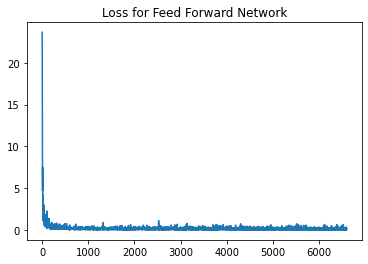

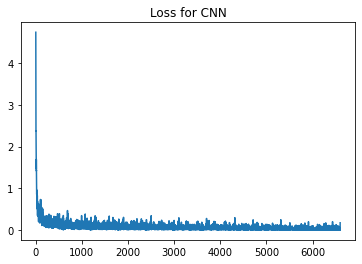


Initializing the Auto encoder-decoder ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11

Initializing the simple neural network ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Evaluating on training data ...
Evaluating on test data ...
Training accuracy:  97.3
Test accuracy:  95.76

Initializing the convolutional neural network ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Evaluating on training data ...
Evaluating on test data ...
Training accuracy:  99.55
Test accuracy:  99.55


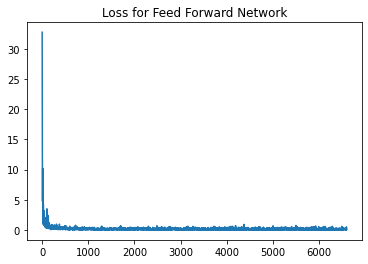

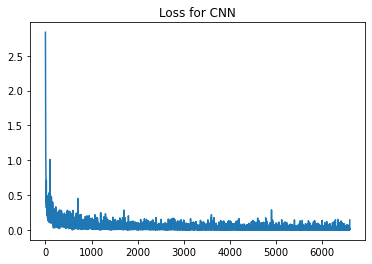


Initializing the Auto encoder-decoder ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11

Initializing the simple neural network ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Evaluating on training data ...
Evaluating on test data ...
Training accuracy:  96.9
Test accuracy:  95.0

Initializing the convolutional neural network ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Evaluating on training data ...
Evaluating on test data ...
Training accuracy:  99.46
Test accuracy:  99.46


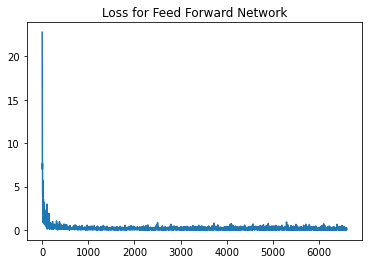

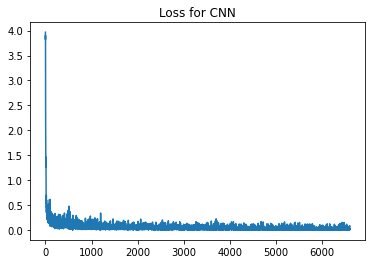


Initializing the Auto encoder-decoder ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11

Initializing the simple neural network ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Evaluating on training data ...
Evaluating on test data ...
Training accuracy:  97.52
Test accuracy:  95.98

Initializing the convolutional neural network ...
Training the network ...
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Evaluating on training data ...
Evaluating on test data ...
Training accuracy:  99.15
Test accuracy:  99.15


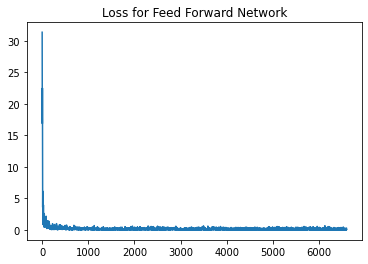

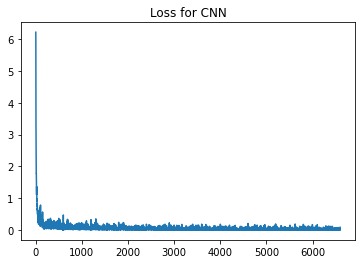

In [0]:
train_set = datasets.MNIST('./mnist_data', download=True, train=True,
                            transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,))
                            ]))
test_set = datasets.MNIST('./mnist_data', download=True, train=False,
                            transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,))
                            ]))

hidde_sizes=[39,120,236,331]
input_size=784

x_train_c=train_set.data
y_train_c=train_set.targets

x_test_c=test_set.data
y_test_c=test_set.targets

x_train_c = x_train_c.reshape(x_train_c.shape[0], -1)
x_test_c = x_test_c.reshape(x_test_c.shape[0], -1)

train_set.data=x_train_c
test_set.data=x_test_c


hidden_sizes=[39,120,236,331]
variances=[50, 75, 90, 95]
input_size=784

trainset=train_set
valset=test_set

train_loader=createBatches(trainset.data,trainset.targets,batch_size)
test_loader=createBatches(valset.data, valset.targets,batch_size)

train_accs_feed_forward=[variances,[]]
test_accs_feed_forward=[variances,[]]
train_accs_cnn=[variances,[]]
test_accs_cnn=[variances,[]]


for hidden_size in hidden_sizes:
  losses_simple, train_acc_simple, test_acc_simple, losses_cnn, train_acc_cnn, test_acc_cnn = eval_net_d(11, hidden_size, train_loader, test_loader)
  train_accs_feed_forward[1].append(train_acc_simple)
  test_accs_feed_forward[1].append(test_acc_simple)
  train_accs_cnn[1].append(train_acc_cnn)
  test_accs_cnn[1].append(test_acc_cnn)
  plt.plot(losses_simple)
  plt.title('Loss for Feed Forward Network')
  plt.show()
  plt.plot(losses_cnn)
  plt.title('Loss for CNN')
  plt.show()

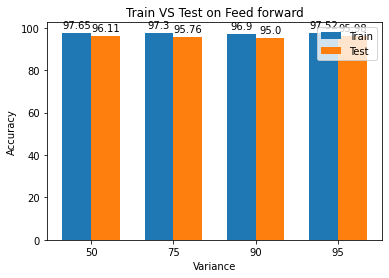

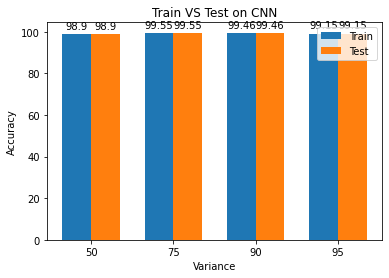

In [0]:
plot_bar_graphs(train_accs_feed_forward, test_accs_feed_forward, title="Train VS Test on Feed forward")
plot_bar_graphs(train_accs_cnn, test_accs_cnn, title="Train VS Test on CNN")

## Observation 




`The NonLinear autoencoder performs and reconstructs image with less noise as compared to linear autoencoders.`



# References:



1.   [PCA using Python (scikit-learn)](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)
2.   
[DEEP LEARNING WITH PYTORCH: A 60 MINUTE BLITZ](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
3. [Grouped bar chart with labels](https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py)



